In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Data Acquisition

In [2]:
cities = pd.read_csv('dim_cities.csv')
print('shape of cities data:', cities.shape)
cities

shape of cities data: (10, 3)


,City_ID,City,Tier
0,CT111,Delhi,Tier 1
1,CT112,Mumbai,Tier 1
2,CT113,Bangalore,Tier 1
3,CT114,Chennai,Tier 1
4,CT115,Kolkata,Tier 2
5,CT116,Hyderabad,Tier 1
6,CT117,Ahmedabad,Tier 2
7,CT118,Pune,Tier 2
8,CT119,Jaipur,Tier 2
9,CT120,Lucknow,Tier 2


In [3]:
respondents = pd.read_csv('dim_repondents.csv')
print('shape of respondent data:', respondents.shape)
respondents.head()

shape of respondent data: (10000, 5)


,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [4]:
survey = pd.read_csv('fact_survey_responses.csv')
print('shape of survey data:', survey.shape)
survey.head()

shape of survey data: (10000, 23)


,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


#### Let's explore data for missing values, duplicates, inconsistency and redundancy before analysis

In [5]:
respondents.isnull().sum()

Respondent_ID    0
Name             0
Age              0
Gender           0
City_ID          0
dtype: int64

In [6]:
survey.isnull().sum()

Response_ID                       0
Respondent_ID                     0
Consume_frequency                 0
Consume_time                      0
Consume_reason                    0
Heard_before                      0
Brand_perception                  0
General_perception                0
Tried_before                      0
Taste_experience                  0
Reasons_preventing_trying         0
Current_brands                    0
Reasons_for_choosing_brands       0
Improvements_desired              0
Ingredients_expected              0
Health_concerns                   0
Interest_in_natural_or_organic    0
Marketing_channels                0
Packaging_preference              0
Limited_edition_packaging         0
Price_range                       0
Purchase_location                 0
Typical_consumption_situations    0
dtype: int64

In [7]:
#checking for duplicates in whole dataframe and then based on city_ID(as it is unique for all cities)
print(respondents.duplicated().sum())
print(respondents.duplicated(['Respondent_ID']).sum())

0
0


In [8]:
#checking for duplicates in whole dataframe and then based on Respondent_ID(as it is unique for all respondents)
print(survey.duplicated().sum())
print(survey.duplicated(['Respondent_ID']).sum())

0
0


##### data seems clean move to analysis with each question

In [9]:
#lets merge respondents and survey dataframe before procedding further
survey = pd.merge(left=respondents, right=survey, on='Respondent_ID', how='outer')

In [10]:
survey.head()

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,120031,Aniruddh Issac,15-18,Female,CT117,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,120032,Trisha Rout,19-30,Male,CT118,103002,2-3 times a month,Throughout the day,To boost performance,No,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,120033,Yuvraj Virk,15-18,Male,CT116,103003,Rarely,Before exercise,Increased energy and focus,No,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,120034,Pranay Chand,31-45,Female,CT113,103004,2-3 times a week,To stay awake during work/study,To boost performance,No,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise
4,120035,Mohanlal Joshi,19-30,Female,CT120,103005,Daily,To stay awake during work/study,Increased energy and focus,Yes,...,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late


In [11]:
#lets merge cities and survey dataframe
survey = pd.merge(survey, cities, on='City_ID', how='outer')

In [12]:
survey.head()

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Ahmedabad,Tier 2
1,120055,Umang Sarkar,31-45,Non-binary,CT117,103025,Once a week,Before exercise,To enhance sports performance,Yes,...,No,No,Outdoor billboards,Eco-friendly design,No,Above 150,Gyms and fitness centers,Studying/working late,Ahmedabad,Tier 2
2,120057,Kanav Thaman,19-30,Male,CT117,103027,Daily,Before exercise,To boost performance,No,...,No,Not Sure,TV commercials,Innovative bottle design,No,50-99,Online retailers,Sports/exercise,Ahmedabad,Tier 2
3,120078,Suhana Ramakrishnan,19-30,Female,CT117,103048,Rarely,Before exercise,To enhance sports performance,No,...,Yes,Yes,TV commercials,Other,Not Sure,100-150,Supermarkets,Sports/exercise,Ahmedabad,Tier 2
4,120098,Saira Sridhar,19-30,Male,CT117,103068,Daily,Throughout the day,Other,No,...,Yes,No,TV commercials,Compact and portable cans,Yes,100-150,Other,Studying/working late,Ahmedabad,Tier 2


### Ques1. Who prefers energy drink more? (male/female/non-binary?)

In [13]:
#Checking preference based on gender
print(survey['Gender'].value_counts(normalize=True)*100)
pd.crosstab(survey['Gender'], survey['Consume_frequency']).sort_values('Daily', ascending=False)

Male          60.38
Female        34.55
Non-binary     5.07
Name: Gender, dtype: float64


Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
Gender,,,,,
Male,968,2094,817,973,1186
Female,549,1217,466,561,662
Non-binary,96,180,63,75,93


In [14]:
#Checking preference based on gender
print(survey['Gender'].value_counts())
pd.crosstab(survey['Gender'], survey['Consume_frequency']).sort_values('Daily', ascending=False)

Male          6038
Female        3455
Non-binary     507
Name: Gender, dtype: int64


Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
Gender,,,,,
Male,968,2094,817,973,1186
Female,549,1217,466,561,662
Non-binary,96,180,63,75,93


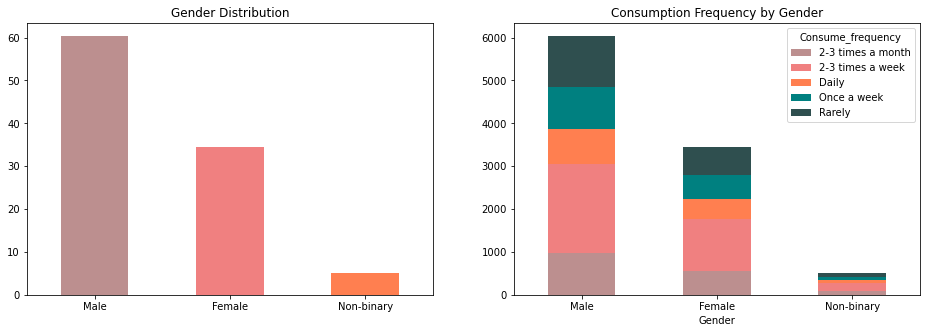

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
c = ['rosybrown', 'lightcoral', 'coral', 'teal', 'darkslategray', 'aqua', 'steelblue']

(survey['Gender'].value_counts(normalize=True)*100).plot.bar(ax=ax[0], color=c)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation='horizontal')
ax[0].set_title('Gender Distribution')

pd.crosstab(survey['Gender'], survey['Consume_frequency']).sort_values('Daily', ascending=False).plot.bar(stacked=True, ax=ax[1], color=c)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation='horizontal')
ax[1].set_title('Consumption Frequency by Gender')

plt.show()

**Observations:**

- Gender Distribution: Among the respondents, the majority are males (60.38%), followed by females (34.55%) and non-binary individuals (5.07%).
- Consumption Frequency by Gender: When analyzing the consumption frequency of energy drinks based on gender, the following observations can be made:
    - Daily Consumption: Males have the highest number of daily energy drink consumers (817), followed by females (466) and non-binary individuals (63).
    - Overall Consumption: Males also have higher counts in other consumption frequency categories, such as 2-3 times a week, 2-3 times a month, and once a week.

These observations suggest that there is a gender difference in energy drink consumption, with males showing a higher preference and frequency of consumption compared to females and non-binary individuals.

### Ques2. Which age group prefers energy drinks more?

In [16]:
#checking preference based on Age
print(survey['Age'].value_counts(normalize=True)*100)
pd.crosstab(survey['Age'], survey['Consume_frequency']).sort_values('Daily', ascending=False)

19-30    55.20
31-45    23.76
15-18    14.88
46-65     4.26
65+       1.90
Name: Age, dtype: float64


Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
Age,,,,,
19-30,891,1917,736,888,1088
31-45,398,809,348,361,460
15-18,232,539,196,244,277
46-65,66,155,42,86,77
65+,26,71,24,30,39


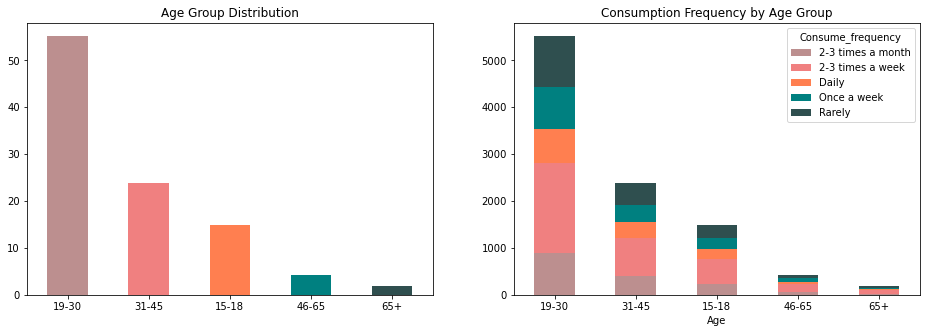

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
c = ['rosybrown', 'lightcoral', 'coral', 'teal', 'darkslategray', 'aqua', 'steelblue']

(survey['Age'].value_counts(normalize=True)*100).plot.bar(ax=ax[0], color=c)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation='horizontal')
ax[0].set_title('Age Group Distribution')

pd.crosstab(survey['Age'], survey['Consume_frequency']).sort_values('Daily', ascending=False).plot.bar(stacked=True, ax=ax[1], color=c)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation='horizontal')
ax[1].set_title('Consumption Frequency by Age Group')

plt.show()

#### Observations:

- Age Group Distribution: Among the respondents, the largest age group is 19-30 (55.20%), followed by 31-45 (23.76%), 15-18 (14.88%), 46-65 (4.26%), and 65+ (1.90%).

- Consumption Frequency by Age Group: When analyzing the consumption frequency of energy drinks based on age groups, the following observations can be made:

    - Daily Consumption: The age group of 19-30 has the highest number of daily energy drink consumers (736), followed by the age group of 31-45 (348) and 15-18 (196).
    - Overall Consumption: In general, the age group of 19-30 has higher counts in other consumption frequency categories as well, such as 2-3 times a month, 2-3 times a week, and once a week.

These observations indicate that the age group of 19-30 shows a higher preference and frequency of consuming energy drinks compared to other age groups

### Ques3. Which type of marketing reaches the most Youth (15-30)?

In [18]:
survey['Age'].value_counts()

19-30    5520
31-45    2376
15-18    1488
46-65     426
65+       190
Name: Age, dtype: int64

According to question the target age group is '15-30' and we have two different age groups in data as '15-18' and '19-30' so will filter dataframe where only age '15-18' and '19-30' exists in age column.

In [19]:
survey1 = survey[(survey['Age'] == '15-18') | (survey['Age'] == '19-30')]

In [20]:
survey1.head()

,Respondent_ID,Name,Age,Gender,City_ID,Response_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,...,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,City,Tier
0,120031,Aniruddh Issac,15-18,Female,CT117,103001,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Ahmedabad,Tier 2
2,120057,Kanav Thaman,19-30,Male,CT117,103027,Daily,Before exercise,To boost performance,No,...,No,Not Sure,TV commercials,Innovative bottle design,No,50-99,Online retailers,Sports/exercise,Ahmedabad,Tier 2
3,120078,Suhana Ramakrishnan,19-30,Female,CT117,103048,Rarely,Before exercise,To enhance sports performance,No,...,Yes,Yes,TV commercials,Other,Not Sure,100-150,Supermarkets,Sports/exercise,Ahmedabad,Tier 2
4,120098,Saira Sridhar,19-30,Male,CT117,103068,Daily,Throughout the day,Other,No,...,Yes,No,TV commercials,Compact and portable cans,Yes,100-150,Other,Studying/working late,Ahmedabad,Tier 2
5,120103,Ishaan Raj,19-30,Female,CT117,103073,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,...,No,Not Sure,Online ads,Eco-friendly design,No,100-150,Supermarkets,Social outings/parties,Ahmedabad,Tier 2


Now we have filtered dataframe let's proceed for the analysis

In [21]:
survey1['Marketing_channels'].value_counts(normalize=True)*100

Online ads            48.130708
TV commercials        25.470890
Outdoor billboards    10.017123
Other                 10.017123
Print media            6.364155
Name: Marketing_channels, dtype: float64

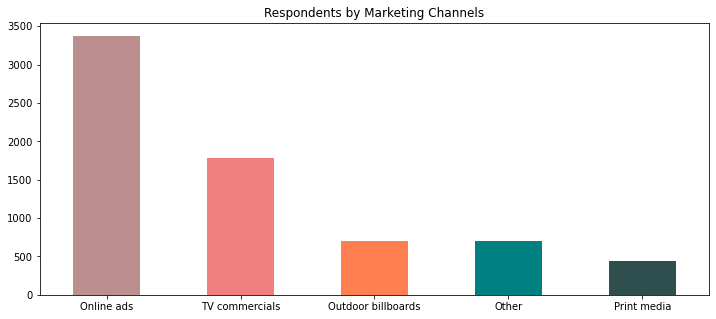

In [22]:
figure = plt.figure(figsize=[12, 5])
c = ['rosybrown', 'lightcoral', 'coral', 'teal', 'darkslategray', 'aqua', 'steelblue']
survey1['Marketing_channels'].value_counts().plot.bar(color=c)
plt.title('Respondents by Marketing Channels')
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- Online ads: Among the different marketing channels, online ads seem to have the highest engagement among the age group 15-30, with 48.13% respondents belonging to this age group. 
- TV Commercials: TV commercials also have a considerable reach among the age group 15-30, with 24.47% respondents. However, the engagement decreases in the older age groups.

These observations suggest that for targeting the youth demographic (age group 15-30), focusing on online ads and TV commercials can be more effective in terms of reach and engagement.

### Ques4. What are the preferred ingredients of energy drinks among respondents?

In [23]:
survey['Ingredients_expected'].value_counts()

Caffeine    3896
Vitamins    2534
Sugar       2017
Guarana     1553
Name: Ingredients_expected, dtype: int64

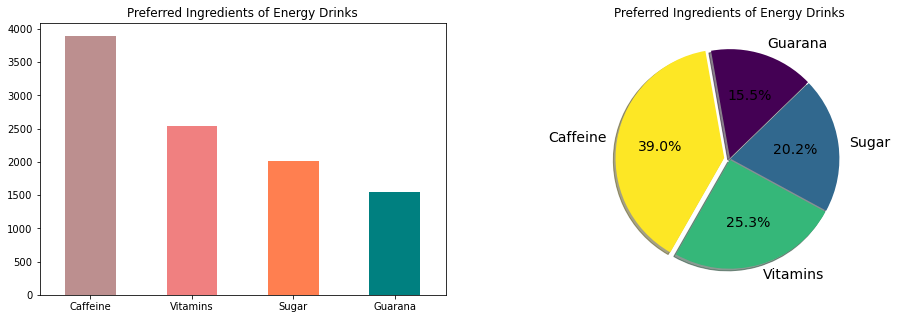

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
c = ['rosybrown', 'lightcoral', 'coral', 'teal', 'darkslategray', 'aqua', 'steelblue']

survey['Ingredients_expected'].value_counts().plot.bar(ax=ax[0],color=c)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation='horizontal')
ax[0].set_title('Preferred Ingredients of Energy Drinks')

survey['Ingredients_expected'].value_counts().plot(kind='pie', fontsize=14,explode=[0.05,0.01,0.01,0.01],
                                       autopct='%1.1f%%', 
                                       shadow=True, startangle=100, cmap='viridis_r')
plt.ylabel('')
plt.title('Preferred Ingredients of Energy Drinks')

plt.show()

**Observations:**

- 39% respondents mentioned caffeine as an expected ingredient in energy drinks. Caffeine is a common ingredient in energy drinks known for its stimulant effects and ability to enhance alertness and energy levels 
- It shows that caffeine is the most commonly expected ingredient, followed by vitamins, sugar, and guarana.

### Ques5. What packaging preferences do respondents have for energy drinks?

In [25]:
survey['Packaging_preference'].value_counts()

Compact and portable cans    3984
Innovative bottle design     3047
Collectible packaging        1501
Eco-friendly design           983
Other                         485
Name: Packaging_preference, dtype: int64

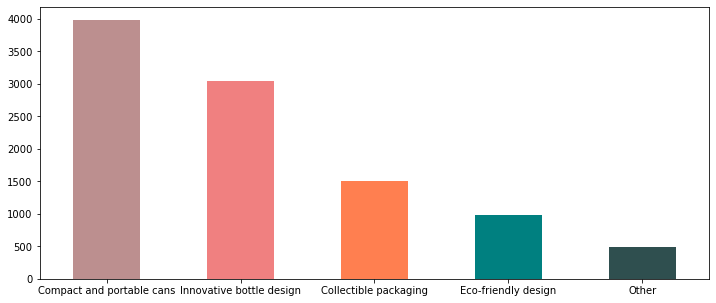

In [26]:
figure = plt.figure(figsize=[12, 5])
c = ['rosybrown', 'lightcoral', 'coral', 'teal', 'darkslategray', 'aqua', 'steelblue']
survey['Packaging_preference'].value_counts().plot.bar(color=c)
plt.xticks(rotation='horizontal')
plt.show()

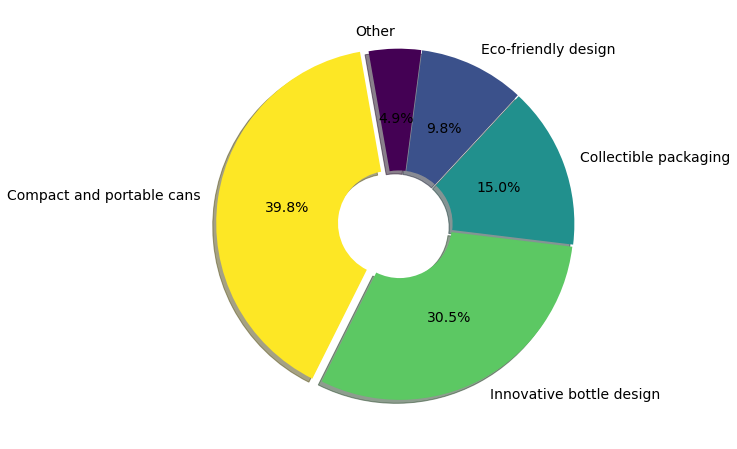

In [27]:
figure = plt.figure(figsize=[8,8])
survey['Packaging_preference'].value_counts().plot(kind='pie', fontsize=14,explode=[0.05,0.01,0.01,0.01,0.01],
                                       autopct='%3.1f%%',wedgeprops=dict(width=0.70),
                                       shadow=True, startangle=100, cmap='viridis_r')

plt.ylabel('')
plt.show()

**Observations:**

- Approximately 39.84% of the respondents expressed a preference for energy drinks packaged in compact and portable cans. 
-  It shows that compact and portable cans are the most preferred packaging option, followed by innovative bottle design, collectible packaging, and eco-friendly design. The "Other" category represents a smaller proportion of respondents who have unique or specific packaging preferences.

### Ques6. Who are the current market leaders?

In [28]:
survey['Current_brands'].value_counts()

Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: Current_brands, dtype: int64

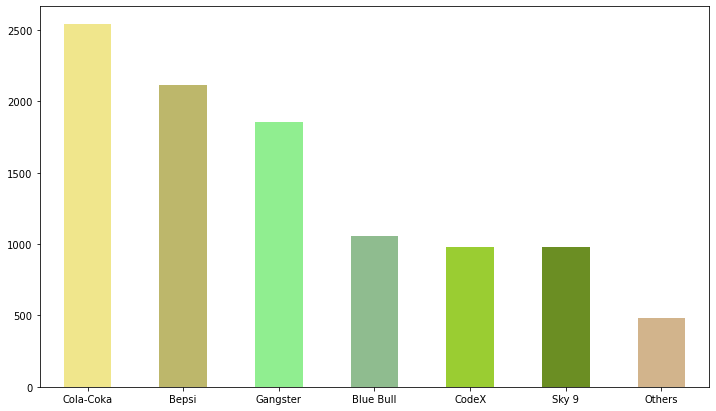

In [29]:
figure = plt.figure(figsize=[12, 7])
survey['Current_brands'].value_counts().plot.bar(color=['khaki', 'darkkhaki','lightgreen','darkseagreen','yellowgreen','olivedrab','tan'])
plt.xticks(rotation='horizontal')
plt.show()

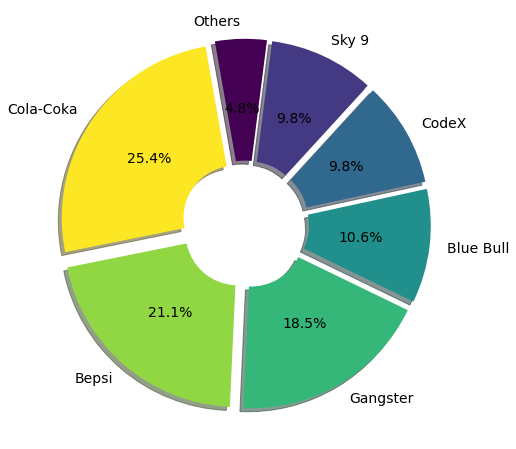

In [30]:
figure = plt.figure(figsize=[8,8])
space=np.ones(7)/15
survey['Current_brands'].value_counts().plot(kind='pie', fontsize=14,explode=space,
                                       autopct='%3.1f%%', wedgeprops=dict(width=0.70),
                                       shadow=True, startangle=100, cmap='viridis_r')

plt.ylabel('')
plt.show()

**Observations:**

- Approximately 25.4% of the respondents indicated a preference for Cola-Coka energy drink. 
-  Cola-Coka appears to be the most preferred brand, followed by Bepsi and Gangster. CodeX and Sky 9 have similar levels of preference, while Blue Bull holds a lower but still notable percentage.

### Ques7. What are the primary reasons consumers prefer those brands over ours?

In [31]:
survey['Reasons_for_choosing_brands'].value_counts()

Brand reputation           2652
Taste/flavor preference    2011
Availability               1910
Effectiveness              1748
Other                      1679
Name: Reasons_for_choosing_brands, dtype: int64

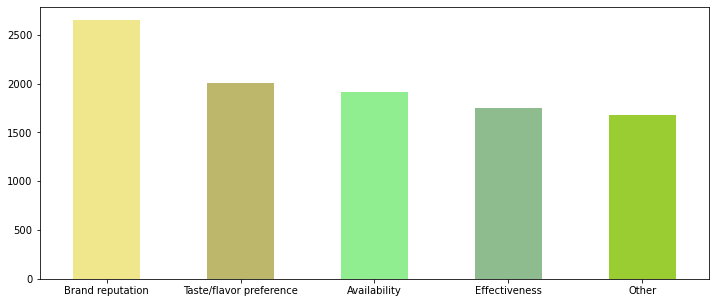

In [32]:
figure = plt.figure(figsize=[12, 5])
survey['Reasons_for_choosing_brands'].value_counts().plot.bar(color=['khaki', 'darkkhaki','lightgreen','darkseagreen','yellowgreen'])
plt.xticks(rotation='horizontal')
plt.show()

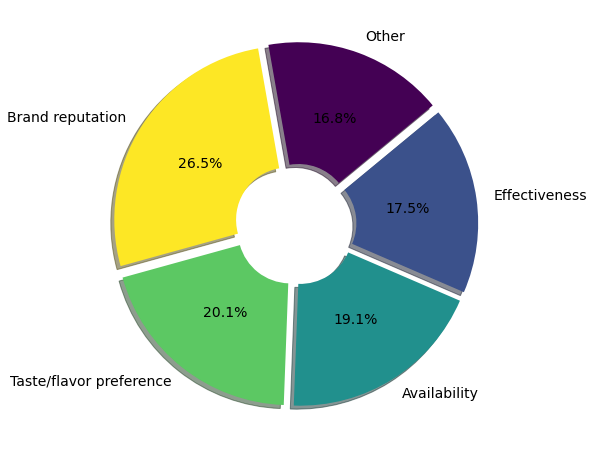

In [33]:
figure = plt.figure(figsize=[8,8])
space= np.ones(5)/20

survey['Reasons_for_choosing_brands'].value_counts().plot(kind='pie', fontsize=14,explode=space,
                                       autopct='%3.1f%%',  wedgeprops=dict(width=0.70),
                                       shadow=True, startangle=100, cmap='viridis_r')

plt.ylabel('')
plt.show()

#### Observations:

- Approximately 26.5% of the respondents mentioned that they prefer the current brands due to their reputation. This indicates that the brands have established a positive image and trust among consumers. 
-  These insights highlight the key factors influencing consumers' preferences for the current energy drink brands over CodeX. By understanding these reasons, the marketing team can identify areas for improvement and develop strategies to address consumer preferences and differentiate CodeX in the market

### Ques8. Which marketing channel can be used to reach more customers?

In [34]:
survey['Marketing_channels'].value_counts()

Online ads            4020
TV commercials        2688
Outdoor billboards    1226
Other                 1225
Print media            841
Name: Marketing_channels, dtype: int64

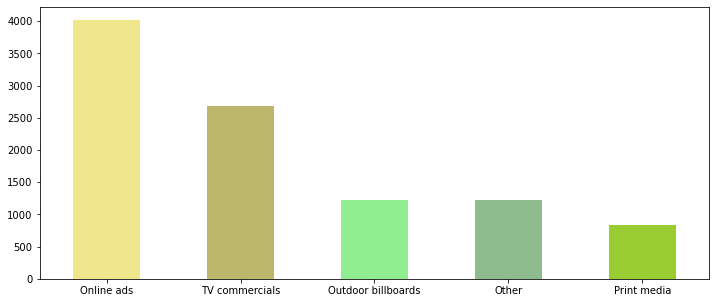

In [35]:
figure = plt.figure(figsize=[12, 5])
survey['Marketing_channels'].value_counts().plot.bar(color=['khaki', 'darkkhaki','lightgreen','darkseagreen','yellowgreen'])
plt.xticks(rotation='horizontal')
plt.show()

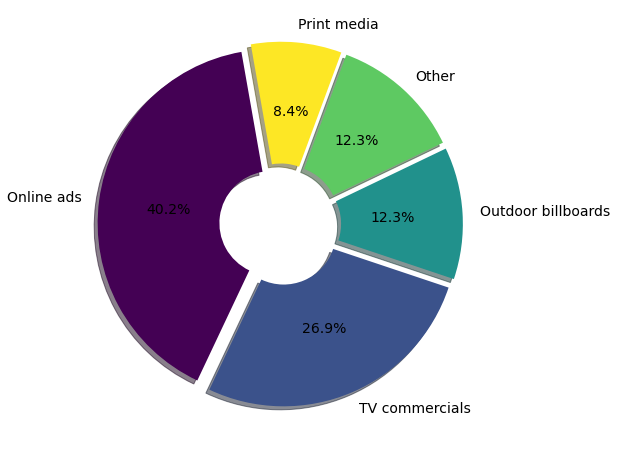

In [36]:
figure = plt.figure(figsize=[8,8])
space= np.ones(5)/20

survey['Marketing_channels'].value_counts().plot(kind='pie', fontsize=14,explode=space,
                                       autopct='%3.1f%%',  wedgeprops=dict(width=0.70),
                                       shadow=True, startangle=100, cmap='viridis')

plt.ylabel('')
plt.show()

#### Observations:

- "Online ads" is the most preferred marketing channel, with 40.2% of respondents indicating their preference for this channel.
-  Therefore, based on the survey results, using online ads as a marketing channel can potentially reach more customers in the given context. The marketing team may consider allocating resources and designing effective online ad campaigns to target a larger customer base

### Ques9. How effective are different marketing strategies and channels in reaching our customers?

In [37]:
survey['Heard_before'].value_counts()

No     5553
Yes    4447
Name: Heard_before, dtype: int64

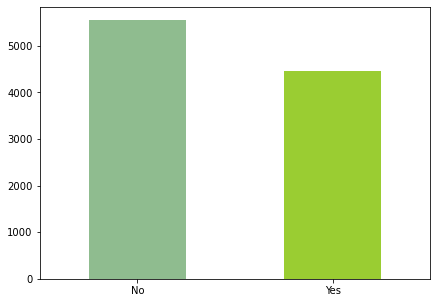

In [38]:
figure = plt.figure(figsize=[7,5])
survey['Heard_before'].value_counts().plot.bar(color=['darkseagreen','yellowgreen'])
plt.xticks(rotation='horizontal')
plt.show()

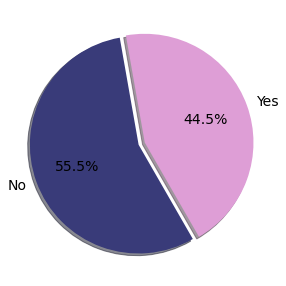

In [39]:
figure = plt.figure(figsize=[5,5])
survey['Heard_before'].value_counts().plot(kind='pie', fontsize=14,explode=[0.05,0.01],
                                       autopct='%3.1f%%',
                                       shadow=True, startangle=100, cmap='tab20b')
plt.ylabel('')
plt.show()

#### Observations:

- Based on the survey data, approximately 44.5% of respondents have heard about our brand through different marketing channels. This indicates that the marketing strategies and channels have been somewhat effective in reaching a portion of our target customers.
-  However, it's important to note that 55.5% of respondents have not heard about our brand before. This suggests that there is still room for improvement in reaching a wider audience and increasing brand awareness.

Additionally, it would be beneficial to analyze the response data in more detail to identify the specific marketing strategies and channels that have been most effective in reaching target customers. This analysis can help in optimizing marketing efforts and allocate resources to the most impactful channels to increase customer reach and improve overall effectiveness.

In [40]:
pd.crosstab(survey['Marketing_channels'], survey['Heard_before']).sort_values('Yes', ascending=False)

Heard_before,No,Yes
Marketing_channels,,
Online ads,2215,1805
TV commercials,1431,1257
Outdoor billboards,702,524
Other,735,490
Print media,470,371


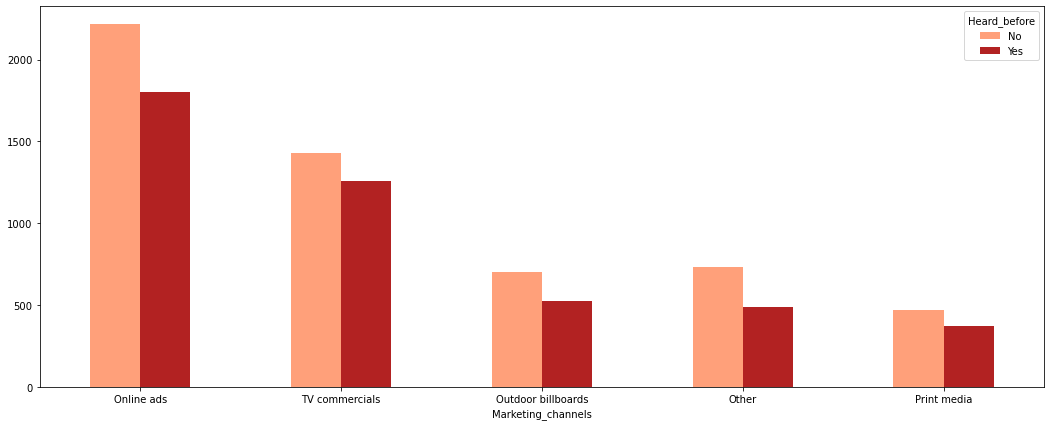

In [41]:
fig, ax = plt.subplots(figsize=(18,7))
pd.crosstab(survey['Marketing_channels'], survey['Heard_before']).sort_values('Yes', ascending=False).plot.bar(ax=ax, color=['lightsalmon','firebrick'])
plt.xticks(rotation='horizontal')
plt.show()

These numbers provide insights into the effectiveness of each marketing channel in reaching target customers.

- Among the respondents who have heard about the brand before, the majority attributed their awareness to online ads, which made the largest contribution. This was closely followed by TV commercials and outdoor billboards as effective marketing channels for creating brand awareness.

### Ques10. What do people think about our brand? (overall rating)

To analyze the overall rating of respondents about the CodeX brand, we can consider specific survey questions related to brand perception and taste experience. By examining the responses to these questions, we can gain insights into people's opinions about our brand.

In [42]:
survey['Brand_perception'].value_counts()

Neutral     5974
Positive    2257
Negative    1769
Name: Brand_perception, dtype: int64

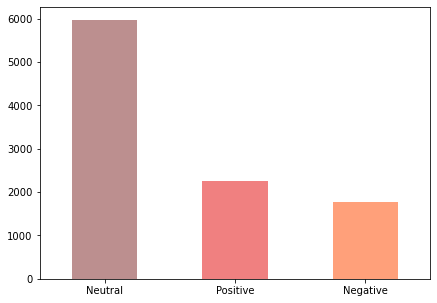

In [43]:
figure = plt.figure(figsize=[7,5])
survey['Brand_perception'].value_counts().plot.bar(color=['rosybrown', 'lightcoral','lightsalmon'])
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- The positive perception of brand is relatively lower compared to the neutral perception. This indicates the need to focus on enhancing the positive aspects of our brand and effectively communicating them to the target audience.

It is crucial to analyze the factors contributing to the neutral and negative perceptions, such as brand messaging, customer experiences, and competitors' influence, to identify areas for improvement and devise strategies for brand enhancement.

In [44]:
survey['Taste_experience'].value_counts()

3    2957
4    2479
5    1986
2    1524
1    1054
Name: Taste_experience, dtype: int64

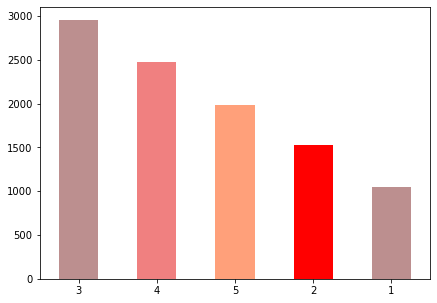

In [45]:
figure = plt.figure(figsize=[7,5])
survey['Taste_experience'].value_counts().plot.bar(color=['rosybrown', 'lightcoral','lightsalmon','red'])
plt.xticks(rotation='horizontal')
plt.show()

#### Observations:

- The majority of respondents rated their taste experience with the CodeX brand as 3(Average), indicating a Moderate satisfaction level.
- Ratings 4(good) and 5(excellent), representing higher levels of satisfaction.
- However, there are also a significant number of respondents who gave lower ratings of 1(poor) and 2(below average), suggesting that there is room for improvement in taste experience.

These insights highlight that while a considerable portion of respondents are satisfied with the taste of CodeX energy drinks, there is still a need to address the preferences of those who provided lower ratings. This information can be valuable for identifying areas of improvement and enhancing the taste experience of the CodeX brand.

### Ques11. Which cities do we need to focus more on?

To determine the cities on which we need to focus more, we can analyze the data using the following approaches:
1. Frequency of respondents from each city:
    - This approach helps us identify the cities where our survey has received the most responses, indicating higher engagement or awareness in those cities.
2. Consumption frequency of respondents:
    - This approach helps us understand the consumption patterns and preferences of respondents in different cities, allowing us to tailor our marketing strategies and product offerings accordingly.
3. Awareness about the energy drink:
    - This approach helps us identify the cities where our brand awareness is relatively low, indicating a need to focus on marketing and promotional activities in those areas.

In [46]:
#Frequency of respondents from each city
survey['City'].value_counts()

Bangalore    2828
Hyderabad    1833
Mumbai       1510
Chennai       937
Pune          906
Kolkata       566
Ahmedabad     456
Delhi         429
Jaipur        360
Lucknow       175
Name: City, dtype: int64

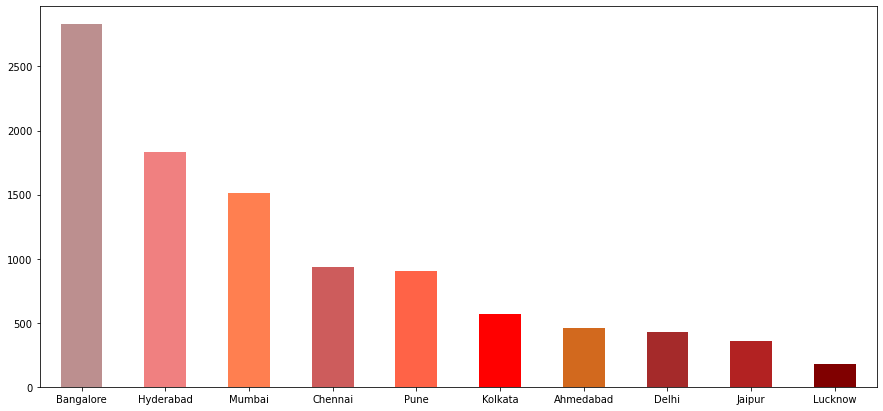

In [47]:
figure = plt.figure(figsize=[15,7])
c = ['rosybrown','lightcoral','coral','indianred','tomato','red','chocolate','brown','firebrick','maroon']
survey['City'].value_counts().plot.bar(color = c)
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- Bangalore has the highest percentage of respondents (28.3%), indicating a significant presence of potential customers in the city. This suggests that Bangalore should be a key focus area for marketing and promotional activities.
- Hyderabad follows closely with 18.3% of respondents, suggesting it is another city with a sizable customer base. Allocating resources to target Hyderabad would be beneficial.
- Mumbai and Chennai have 15.1% and 9.4% of respondents, respectively, indicating a moderate customer presence. These cities should also be considered for marketing efforts to tap into their market potential.
- Pune and Kolkata have relatively lower percentages of respondents (9.1% and 5.7% respectively), but they still represent significant customer bases. Targeted marketing campaigns and brand awareness initiatives in these cities can help expand our reach.
- Ahmedabad, Delhi, Jaipur, and Lucknow have smaller percentages of respondents (ranging from 4.6% to 1.7%), suggesting a comparatively lower level of customer engagement or awareness. These cities present an opportunity for us to focus on increasing brand visibility and market penetration.

In [48]:
#Consumption frequency of respondents by city
pd.crosstab(survey['City'], survey['Consume_frequency']).sort_values(['Daily'], ascending=False)

Consume_frequency,2-3 times a month,2-3 times a week,Daily,Once a week,Rarely
City,,,,,
Chennai,211,90,378,87,171
Bangalore,562,1432,302,272,260
Delhi,84,62,163,42,78
Mumbai,313,767,143,140,147
Hyderabad,86,392,95,527,733
Jaipur,64,73,91,89,43
Pune,186,454,82,93,91
Lucknow,39,30,34,51,21
Kolkata,32,100,32,177,225


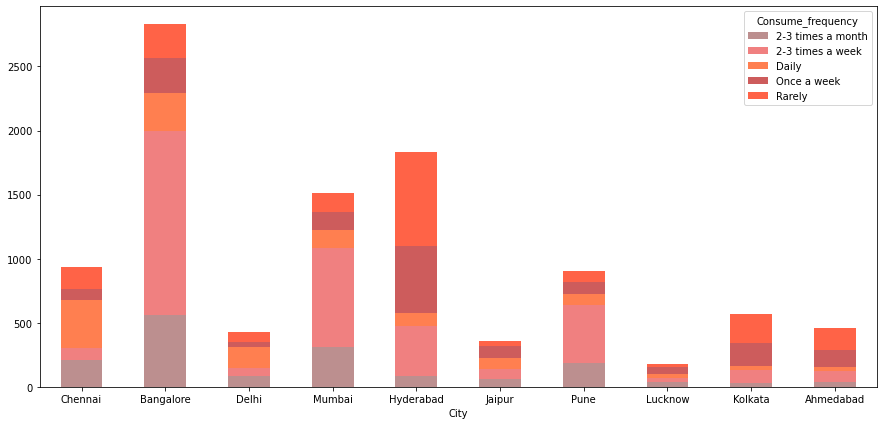

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
c = ['rosybrown','lightcoral','coral','indianred','tomato']
pd.crosstab(survey['City'], survey['Consume_frequency']).sort_values('Daily', ascending=False).plot.bar(stacked='True', ax=ax, color= c)
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- Chennai has the highest number of respondents who consume energy drinks on a daily basis (378), followed by Bangalore (302), Hyderabad (95), and Mumbai (143). This indicates that Chennai has a larger proportion of daily consumers compared to other cities.
- Bangalore, Mumbai, and Hyderabad still have a significant number of respondents who consume energy drinks on a daily basis, indicating a substantial market for frequent consumption in these cities.
- Chennai, Hyderabad, and Bangalore also have a considerable number of respondents who consume energy drinks 2-3 times a week, indicating a preference for consuming energy drinks more frequently in these cities.
- So overall Bangalore, chennai, Mumbai, pune and Hyderabad can be considered top 5 cities with a substantial number of daily and frequent energy drink consumers.

In [50]:
#Awareness about the codeX by city
pd.crosstab(survey['City'], survey['Heard_before']).sort_values('Yes', ascending=False)

Heard_before,No,Yes
City,,
Bangalore,1670,1158
Mumbai,611,899
Hyderabad,1105,728
Pune,529,377
Chennai,565,372
Delhi,162,267
Kolkata,356,210
Ahmedabad,249,207
Jaipur,216,144


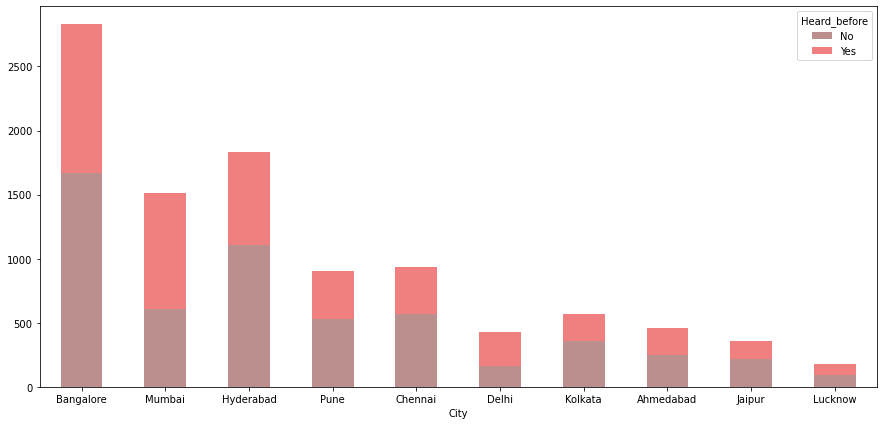

In [51]:
fig, ax = plt.subplots(figsize=(15,7))
c = ['rosybrown','lightcoral']
pd.crosstab(survey['City'], survey['Heard_before']).sort_values('Yes', ascending=False).plot.bar(stacked='True', ax=ax, color= c)
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- Bangalore, Mumbai, and Hyderabad have the highest number of respondents who have heard about our brand. These cities have a relatively higher level of brand awareness compared to others.
- Pune, Chennai, and Delhi also have a considerable number of respondents who have heard about our brand, although the numbers are slightly lower than the top three cities.
- Kolkata, Ahmedabad, Jaipur, and Lucknow have a relatively lower level of brand awareness, with a smaller number of respondents who have heard about our brand.

### Ques12. Where do respondents prefer to purchase energy drinks?

In [52]:
survey['Purchase_location'].value_counts()

Supermarkets                4494
Online retailers            2550
Gyms and fitness centers    1464
Local stores                 813
Other                        679
Name: Purchase_location, dtype: int64

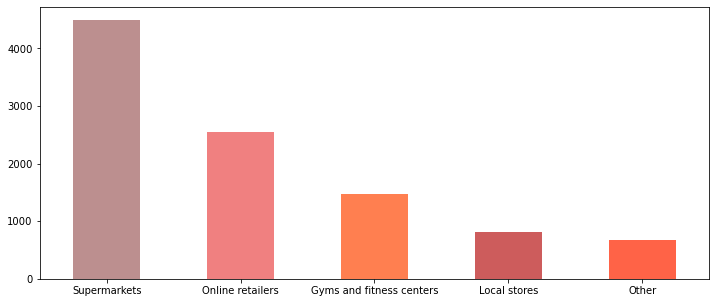

In [53]:
figure = plt.figure(figsize=[12,5])
c = ['rosybrown','lightcoral','coral','indianred','tomato']
survey['Purchase_location'].value_counts().plot.bar(color = c)
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- Supermarkets are the most popular choice for purchasing energy drinks among the respondents. This indicates that a significant portion of consumers prefers the convenience and availability of energy drinks in large retail supermarkets. It suggests that having a strong presence and strategic placement of energy drinks in supermarkets can help capture a substantial share of the market.
- Online retailers are the second most preferred option for purchasing energy drinks. This highlights the growing trend of online shopping and the convenience it offers to consumers. It is essential for energy drink brands to have a strong online presence, optimize their e-commerce platforms, and engage in effective digital marketing strategies to cater to the increasing demand from online shoppers.
- Gyms and fitness centers play a notable role as purchase locations.
- Local stores are still preferred by a portion of respondents.
- Exploring alternative locations can provide additional opportunities.

Based on this data, energy drink brands should focus on supermarkets, online retailers, and partnerships with gyms and fitness centers to target their consumers effectively.

### Ques13. What are the typical consumption situations for energy drinks among respondents?

In [54]:
survey['Typical_consumption_situations'].value_counts()

Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: Typical_consumption_situations, dtype: int64

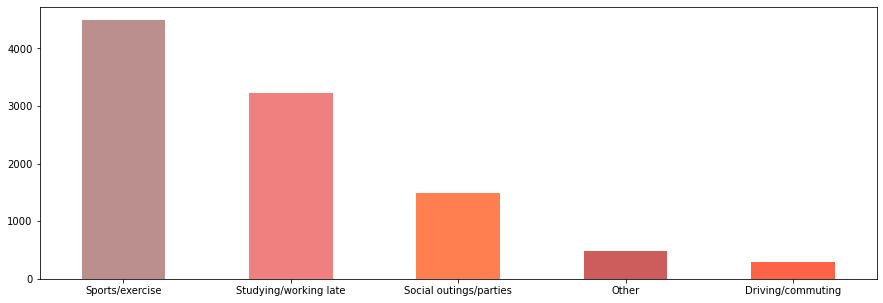

In [55]:
figure = plt.figure(figsize=[15,5])
c = ['rosybrown','lightcoral','coral','indianred','tomato']
survey['Typical_consumption_situations'].value_counts().plot.bar(color = c)
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- Sports/exercise is the most common situation where respondents consume energy drinks, indicating a strong association with physical activity and performance enhancement.
- Studying/working late is another significant consumption situation, suggesting that energy drinks are often used to combat fatigue and improve focus during work or study sessions.
- Social outings/parties also contribute to energy drink consumption, indicating their popularity in social settings.

These insights can help energy drink brands tailor their marketing strategies and product positioning to target consumers based on their typical consumption situations.

### Ques14. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

- First, we will examine the factors influencing respondents' purchase decisions based on price range.

In [56]:
survey['Price_range'].value_counts()

50-99        4288
100-150      3142
Above 150    1561
Below 50     1009
Name: Price_range, dtype: int64

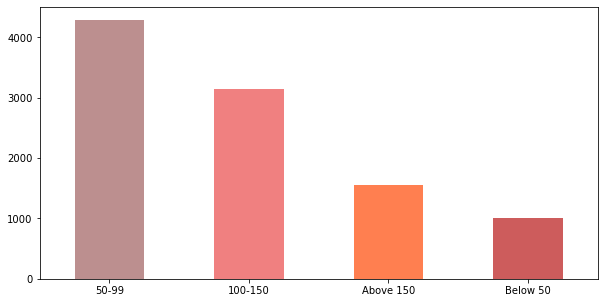

In [57]:
figure = plt.figure(figsize=[10,5])
c = ['rosybrown','lightcoral','coral','indianred']
survey['Price_range'].value_counts().plot.bar(color = c)
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- 42.9% of respondents consider a price range between 50-99 as reasonable for an energy drink.
- 31.4% of respondents are willing to pay a higher price range of 100-150 for an energy drink.

Based on these observations, it can be inferred that a significant portion of respondents are willing to spend more on energy drinks, with the highest percentage falling within the 50-99 price range. Energy drink brands may consider focusing on products within this price range to meet the preferences of a substantial portion of their target audience. Additionally, offering options in the higher price ranges (100-150 and above 150) can cater to consumers who prioritize premium or specialized energy drink products.

- Now, let's explore the influence of limited edition packaging on respondents' purchase decisions.

In [58]:
survey['Limited_edition_packaging'].value_counts()

No          4023
Yes         3946
Not Sure    2031
Name: Limited_edition_packaging, dtype: int64

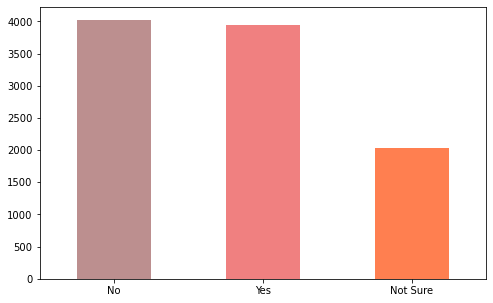

In [59]:
figure = plt.figure(figsize=[8,5])
c = ['rosybrown','lightcoral','coral']
survey['Limited_edition_packaging'].value_counts().plot.bar(color = c)
plt.xticks(rotation='horizontal')
plt.show()

**Observations:**

- 40.2% of respondents indicated that limited edition packaging does not significantly impact their purchase decision.
- 39.5% of respondents expressed a preference for limited edition packaging, suggesting that it can influence their purchase decisions positively.
- 20.3% of respondents were unsure about the influence of limited edition packaging on their purchase decisions.

These observations indicate that limited edition packaging can be a potential factor that influences a significant portion of respondents' purchase decisions. Brand may consider leveraging limited edition packaging as a marketing strategy to attract customers and create a sense of exclusivity or novelty around their energy drink products

### Ques15. Which area of business should we focus more on our product development (Branding/taste/availability)

To determine which area of business should be prioritized for product development (branding, taste, or availability), we can analyze the responses to the following survey questions related to product development.
1. Improvements_desired: This column represents the responses received for the question "What improvements would you like to see in energy drinks currently available in the market?"
2. Preferred ingredients: This question asked respondents about their expectations regarding the ingredients in an energy drink.
3. Health concerns: This question aimed to determine whether respondents were concerned about the health impacts of energy drinks.
4. Interest in natural or organic ingredients: This question assessed respondents' interest in an energy drink with natural or organic ingredients.

In [60]:
survey['Health_concerns'].value_counts()

Yes    6045
No     3955
Name: Health_concerns, dtype: int64

In [61]:
survey['Interest_in_natural_or_organic'].value_counts()

Yes         4983
No          3062
Not Sure    1955
Name: Interest_in_natural_or_organic, dtype: int64

In [62]:
survey['Ingredients_expected'].value_counts()

Caffeine    3896
Vitamins    2534
Sugar       2017
Guarana     1553
Name: Ingredients_expected, dtype: int64

In [63]:
survey['Improvements_desired'].value_counts()

Reduced sugar content       2995
More natural ingredients    2498
Wider range of flavors      2037
Healthier alternatives      1472
Other                        998
Name: Improvements_desired, dtype: int64

Text(0.5, 1.0, 'Desired Improvements')

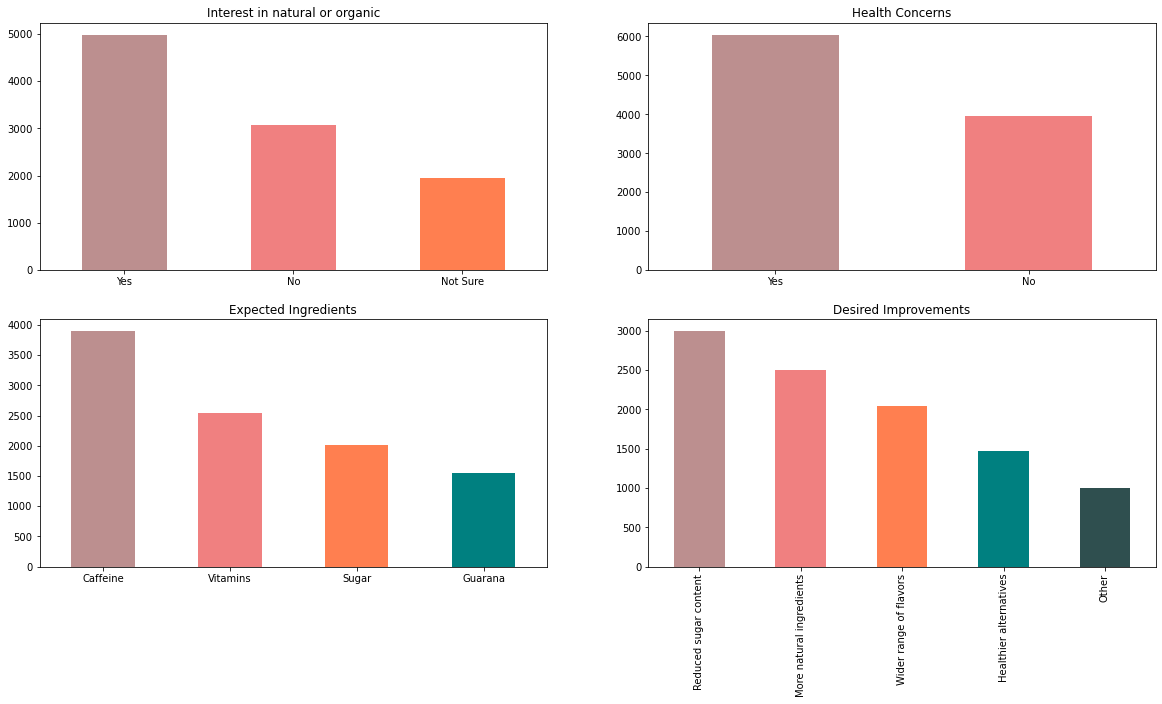

In [64]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
c = ['rosybrown', 'lightcoral', 'coral', 'teal', 'darkslategray', 'aqua', 'steelblue']

survey['Interest_in_natural_or_organic'].value_counts().plot.bar(ax=ax[0,0], color=c)
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation='horizontal')
ax[0,0].set_title('Interest in natural or organic')

survey['Health_concerns'].value_counts().plot.bar(ax=ax[0,1], color=c)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation='horizontal')
ax[0,1].set_title('Health Concerns')

survey['Ingredients_expected'].value_counts().plot.bar(ax=ax[1,0], color=c)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation='horizontal')
ax[1,0].set_title('Expected Ingredients')

survey['Improvements_desired'].value_counts().plot.bar(ax=ax[1,1], color=c)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation='vertical')
ax[1,1].set_title('Desired Improvements')

#### Observation:
1. Health Concerns:
   - This indicates that addressing health concerns and offering healthier alternatives could be an important focus for product development.

2. Interest in Natural or Organic Ingredients:
   - 49.83% of respondents expressed interest in an energy drink with natural or organic ingredients.
   - This suggests that incorporating natural or organic ingredients into the product could be a valuable strategy for product development.

3. Preferred Ingredients:
   - The most commonly expected ingredients in energy drinks are caffeine (38.96%) and vitamins (25.34%).
   - This implies that ensuring the presence of these ingredients and possibly highlighting their benefits could contribute to product development.

4. Improvements Desired:
   - The top desired improvements in energy drinks include reduced sugar content (29.95%) and more natural ingredients (24.98%).
   - Respondents also expressed a desire for a wider range of flavors (20.37%).
   - These findings emphasize the importance of addressing sugar content, incorporating natural ingredients, and expanding flavor options in product development.

Based on these insights, it can be recommended that product development should focus on the following areas:
- Reducing sugar content and offering healthier alternatives
- Incorporating natural or organic ingredients
- Expanding the range of flavors available in energy drinks